# Manipulating ADCP data from FORSA and M124 cruises

In [1]:
## Imports
import level1,level2,analysis
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import netCDF4 as nc
import datetime as dt

## Open files

In [2]:
path1 = '/home/affholder/Documents/Stage/Araujo/Eddie_Tracks/FORSA_Data/FORSA_data/ADCP/'
path2 = '/home/affholder/Documents/ENS/AFC/Stage/Araujo/Eddie_Tracks/FORSA_Data/FORSA_data/ADCP/'
FORSA_path = path2
FORSA_filename = '151701.dat'
path3 = '/home/affholder/Documents/Stage/Araujo/Eddie_Tracks/M124_Data/ADCP/'
path4 = '/home/affholder/Documents/ENS/AFC/Stage/Araujo/Eddie_Tracks/M124_Data/ADCP/'
M124_path = path4
M124_filename = 'M124_ADCP_38khz.txt'

In [ ]:
ADCP_F = level1.FORSA_translate(FORSA_path + FORSA_filename)
ADCP_M = level1.Meteor_translate(M124_path + M124_filename)

In [3]:
# Alternatively
ADCP_F = np.load(FORSA_path + 'ADCP_FORSA.npy').item()
ADCP_M = np.load(M124_path + 'ADCP_M38.npy').item()

In [4]:
# SSH data
SSH = nc.Dataset('../../SSHfields/global-analysis-forecast-phy-001-024_1522088461261.nc')

### Tracks of both campaigns

/usr/lib/python3/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: Mean of empty slice
/usr/lib/python3/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: Mean of empty slice
/usr/lib/python3/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice
/usr/lib/python3/dist-packages/ipykernel_launcher.py:35: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.6/dist-packages/mpl_toolkits/basemap/__init__.py:3707: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/lib/python3.6/dist-packages/mpl_toolkits/basemap/__init__.py:3716: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


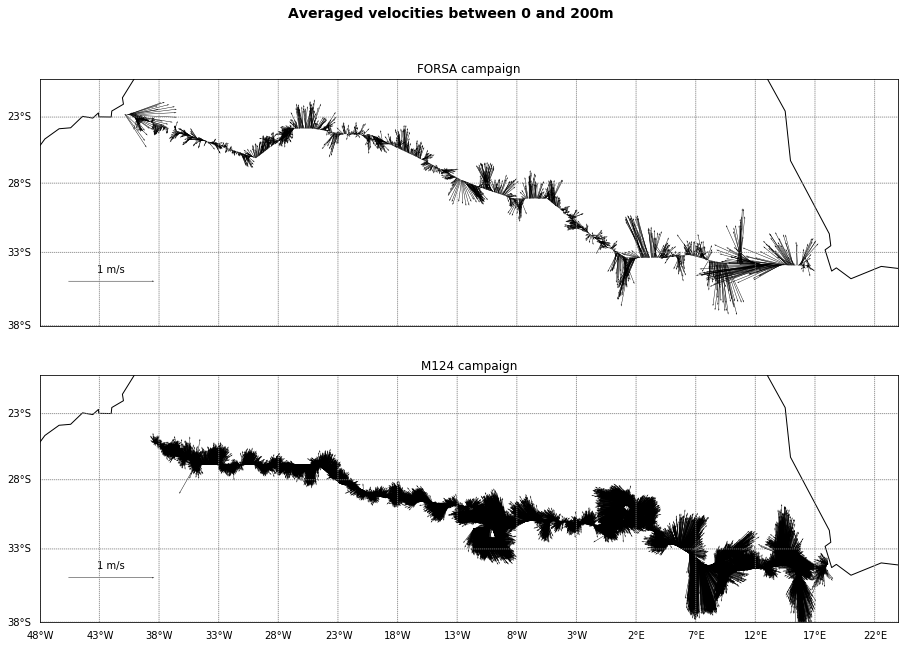

In [5]:
# Set up the figure
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
# Set up the limits and grid
lonmin = -48
lonmax = 24
latmin = -38
latmax = -20
grid = 5
maxdepth = 200
# Set up the projections
m1 = Basemap(ax=ax1,projection='merc',llcrnrlat=latmin,urcrnrlat=latmax,llcrnrlon=lonmin,urcrnrlon=lonmax,resolution='c')
m2 = Basemap(ax=ax2,projection='merc',llcrnrlat=latmin,urcrnrlat=latmax,llcrnrlon=lonmin,urcrnrlon=lonmax,resolution='c')
# Draw the map
m1.drawcoastlines()
m2.drawcoastlines()
# Draw parallels and meridians
parallels = np.arange(latmin,latmax,grid)
meridians = np.arange(lonmin,lonmax,grid)
m1.drawparallels(parallels,labels=[1,0,0,0],color='grey')
m1.drawmeridians(meridians,labels=[0,0,0,0],color='grey')
m2.drawparallels(parallels,labels=[1,0,0,0],color='grey')
m2.drawmeridians(meridians,labels=[0,0,0,1],color='grey')
# Plot the course and the currents
    # FORSA data
flon = ADCP_F['longitudes']
flat = ADCP_F['latitudes']
fU_m = np.nanmean(ADCP_F['U'][:,ADCP_F['depths'] < maxdepth],axis=1)
fV_m = np.nanmean(ADCP_F['V'][:,ADCP_F['depths'] < maxdepth],axis=1)
    # METEOR data
mlon = ADCP_M['longitudes']
mlat = ADCP_M['latitudes']
mU_m = np.nanmean(ADCP_M['U'][:,ADCP_M['depths'] < maxdepth],axis=1)
mV_m = np.nanmean(ADCP_M['V'][:,ADCP_M['depths'] < maxdepth],axis=1)
    # Plot everything
Qf = m1.quiver(flon,flat,fU_m,fV_m,latlon=True,scale=10,pivot='tail',width=0.0005)
Qm = m2.quiver(mlon,mlat,mU_m,mV_m,latlon=True,scale=10,pivot='tail',width=0.0005)
xleg = -42
yleg = -35
xlf,ylf = m1(xleg,yleg)
xlm,ylm = m2(xleg,yleg)
ax1.quiverkey(Qf,xlf,ylf,1, '1 m/s', coordinates='data')
ax2.quiverkey(Qm,xlm,ylm,1, '1 m/s', coordinates='data')

fig.suptitle('Averaged velocities between 0 and 200m', fontsize=14, fontweight='bold')
ax1.set_title('FORSA campaign')
ax2.set_title('M124 campaign')

plt.show()

## Extract data relative to eddies of interest

In [10]:
eddies = {'V1':{'ID':3697413,'box_X':[-0.5,5,5,-0.5,-0.5],'box_Y':[-35,-35,-30,-30,-35],'date':dt.datetime(2015,7,1)},
          'V3':{'ID':3699716,'box_X':[-14,-7.5,-7.5,-14,-14],'box_Y':[-31,-31,-26,-26,-31],'date':dt.datetime(2015,7,6)},
          'M10':{'ID':3810383,'box_X':[-12.5,-7.5,-7.5,-12.5,-12.5],'box_Y':[-34.5,-34.5,-29.5,-29.5,-34.5],'date':dt.datetime(2016,3,8)},
          'M12':{'ID':3812686,'box_X':[-26.5,-22,-22,-26.5,-26.5],'box_Y':[-30,-30,-25,-25,-30],'date':dt.datetime(2016,3,13)}}
ADCP_M10 = level2.PolygonSubsetter(ADCP_M,eddies['M10']['box_X'],eddies['M10']['box_Y'])
ADCP_V1 = level2.PolygonSubsetter(ADCP_F,eddies['V1']['box_X'],eddies['V1']['box_Y'])
ADCP_M12 = level2.PolygonSubsetter(ADCP_M,eddies['M12']['box_X'],eddies['M12']['box_Y'])
ADCP_V3 = level2.PolygonSubsetter(ADCP_F,eddies['V3']['box_X'],eddies['V3']['box_Y'])

## Adapt the coordinates

Here we add a coordinate system in meters to the matrixes enabling proper plotting of raw data which is the along-track distance

First, for the eddy extracted from the FORSA dataset, where horizontal resolution is around 4km and vertical resolution around 16m (goes to 700m).  
Here, the data is put on a regular grid for more accurate viewing. The resolution of the regular grid is still 4km but regular. 

A boxcar filter of dimensions (10km,130m) is applied to extract the mesoscale

/home/affholder/Documents/ENS/AFC/Stage/Araujo/Eddie_Tracks/Scripts/ADCP/analysis.py:247: RuntimeWarning: Mean of empty slice
  fill = np.nanmean(matrix[indexes,j])


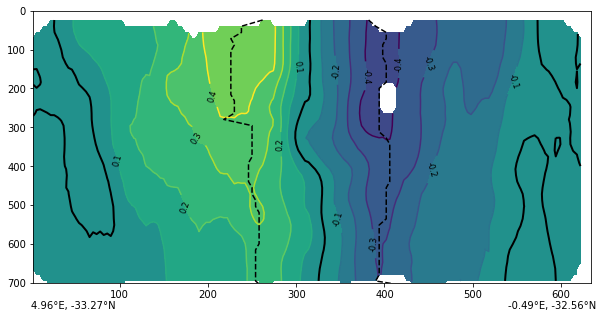

In [134]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.set_ylim(0,700)
#ax1 = fig.add_subplot(2,2,1)
#ax2 = fig.add_subplot(2,2,2)
#ax3 = fig.add_subplot(2,2,3)
#ax4 = fig.add_subplot(2,2,4)
m = Basemap(projection='merc')
lon = ADCP_V1['longitudes']
lat = ADCP_V1['latitudes']
x,y = m(lon,lat)
atd = np.cumsum(np.sqrt( (x[1:] - x[:-1])**2 + (y[1:] - y[:-1])**2 ))
atd = np.append(np.array([0]),atd)
V_reg,atd_reg = analysis.RegularGrid(ADCP_V1['V'],atd,4000,ADCP_V1['depths'])
V_reg_filt = analysis.BoxCarFilter(V_reg,5,3)
PlotADCP(ax,atd_reg,ADCP_V1['depths'],V_reg_filt)
FindMaxMin(V_reg_filt,atd_reg,ADCP_V1['depths'],plot=True,ax=ax)
fig.gca().invert_yaxis()
ax.text(0,760,str(np.round(lon[0],2)) + '°E, ' + str(np.round(lat[0],2)) + '°N',horizontalalignment='left',verticalalignment='center')
ax.text(max(atd/1000),760,str(np.round(lon[-1],2)) + '°E, ' + str(np.round(lat[-1],2)) + '°N',horizontalalignment='right',verticalalignment='center')
plt.show()

In [130]:
def FindMaxMin(V,atd,depths,plot=False,ax=None):

    atd_min = []
    atd_max = []
    dpt = []

    for i in range(len(depths)):
        vs = V[:,i]
        if np.sum(np.isfinite(vs)) > 0:
            min_index = np.where(vs == np.nanmin(vs))[0][0]
            max_index = np.where(vs == np.nanmax(vs))[0][0]
            dpt.append(depths[i])
            atd_min.append(atd_reg[min_index])
            atd_max.append(atd_reg[max_index])
    atd_min = np.array(atd_min)
    atd_max = np.array(atd_max)
    dpt = np.array(dpt)
    if plot:
        ax.plot(atd_min/1000,dpt,'k--')
        ax.plot(atd_max/1000,dpt,'k--')
    else:
        return(atd_min,atd_max,dpt)

In [124]:
def PlotADCP(ax,atd,depths,V):
    """
    Still unfinished with flexibility of reg and filt
    TODO adapt to filtered and regular data
    Returns km
    """
    X,Y = np.meshgrid(atd_reg/1000,ADCP_V1['depths'])
    lvls = np.round(np.arange(-0.8,0.9,0.1),1)
    lvls = np.delete(lvls,8)
    ax.contourf(X,Y,np.transpose(V_reg_filt),levels=lvls)
    cont = ax.contour(X,Y,np.transpose(V_reg_filt),levels = lvls,linewidths=1.5)
    ax.clabel(cont, cont.levels,fmt='%0.1f',fontsize=8, inline=1,colors='k')
    lvl0 = [0]
    ax.contour(X,Y,np.transpose(V_reg_filt),levels=lvl0,colors='black',linewidths=2)

In [20]:
time = nc.num2date(SSH['time'][:],'hours since 1950-01-01 12:00:00')

In [22]:
np.where(time == eddies['V1']['date'])

(array([583]),)

In [38]:
SSH['longitude'][:]

array([-60.      , -59.916668, -59.833332, ...,  29.833334,  29.916666,
        30.      ], dtype=float32)

In [42]:
(lon[0],lat[0])

(4.963806, -33.272517)